In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit

# scipy 설치 안되어있으면 pip install scipy 하면 됨
# 밑에는 단순히 설치되었는지 확인용 코드
import scipy
print(scipy.__version__)

1.9.1


**Well determined system**

Curve fitting with *curve_fit* in scipy

In [38]:
x_data = np.array([1, 2, 3])    
# generate samples manually
# x_data = np.random.randn(3,1)       
# 위 주석처리된 코드는 정규 분포를 따르는 난수(평균 0, 표준편차 1)를 3x1 배열로 생성         
# 3: # samples, 1: # features

# numpy 배열을 직접 생성하여 입력 데이터로 사용
# [1, 2, 3]이라는 3개의 샘플이 존재함

In [39]:
f = lambda x: 3*x**2-1                       
# Define underlying true function
# 주어진 x 값에 대해 2차 함수를 계산하는 람다 함수를 정의

In [ ]:
y_data = f(x_data)
print(y_data) 
# 이렇게 하면 한 줄에 다 출력되지 않고 줄바꿈이 발생할 수 있음
# 일시적으로 [ 2 11]로 보임
print(len(y_data)) 
# 배열 길이 확인 

[ 2 11 26]


In [29]:
def my_func(x,a,b,c):
  return a*x**2+b*x+c

In [ ]:
params1, cov1 = curve_fit(my_func, x_data, y_data)
# my_func(x, a, b, c)를 사용하여 x_data, y_data를 가장 잘 맞추는 최적의 a, b, c 값을 찾음
# curve_fit은 비선형 최소제곱법(Least Squares Method)을 사용하여 최적의 계수를 찾음

In [ ]:
print(params1)
# 최적의 a, b, c 값이 저장됨
# my_func(x, a, b, c)가 f(x) = 3x^2 - 1과 정확히 일치하기 때문에, curve_fit이 a=3, b=0, c=-1을 찾아냄
# 대략 3, 0(매우 작은 값이여서 0에 가까움), -1

[ 3.00000000e+00 -2.17603713e-12 -1.00000000e+00]


In [ ]:
print(cov1) 
# could not be estimated because we the answer is exactly correct
# 공분산 행렬은 매개변수 추정의 신뢰도를 나타냄
# 여기서는 데이터가 완전히 y = 3x^2 - 1에 맞아떨어지기 때문에 오차가 0이 됨
# 추정할 필요가 없으므로 공분산 행렬을 계산할 수 없음

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


**Under determined system**

In [33]:
x_data = np.array([1, 2])
y_data = f(x_data)

In [34]:
print(x_data, y_data)

[1 2] [ 2 11]


In [ ]:
params2, cov2 = curve_fit(my_func, x_data, y_data)
# curve_fit()을 사용할 때 함수의 매개변수 개수(3개: a, b, c)가 데이터 포인트 개수(2개)보다 많아서 발생한 문제
# curve_fit()을 사용하려면 적어도 3개의 데이터 포인트가 필요
# 따라서 x_data의 개수를 3개 이상으로 늘려야함

TypeError: The number of func parameters=3 must not exceed the number of data points=2

**Over determined system**

In [49]:
x_data = np.array([1, 2, 3, 4])
y_data = f(x_data)
# 마찬가지로 데이터 정의 및 함수는 그대로 위에 함수 씀
# x_data에 대한 y 값 계산
# y_data는 2, 11, 26, 47일 것

In [ ]:
params3, cov3 = curve_fit(my_func, x_data, y_data)
# curve_fit을 이용한 비선형 회귀 (최적의 a, b, c 찾기)

In [ ]:
print(params3)
# 최적의 파라미터 (a, b, c) 출력

[ 3.00000000e+00 -2.17137419e-12 -1.00000000e+00]


In [ ]:
print(cov3)
# 공분산 행렬 출력
# y_data가 f(x) = 3x² - 1이라는 정답 함수에서 직접 생성됨
# my_func(x, a, b, c) = ax² + bx + c 모델이 정확히 같은 형태를 가짐
# 따라서 curve_fit()이 완벽한 해를 찾음 (params3 = [3. 0. -1.])
# curve_fit()은 오차가 0이므로 공분산 행렬을 추정할 수 없음

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


**Over determined system with error term**

In [ ]:
y_data = y_data + 7*np.random.randn(*np.shape(y_data))
# y_data에 랜덤 노이즈를 추가하여 실제 데이터에 변동성을 줌
# y_data와 같은 크기의 랜덤한 값을 생성 (평균이 0이고 표준편차가 1인 정규 분포에서 나온 값들)
# 값에 7을 곱함으로써 노이즈의 크기를 7배 크게 만듦
# y_data에 무작위 오차를 추가하여 더 현실적인 데이터셋을 만듦듦

In [ ]:
params4, cov4 = curve_fit(my_func, x_data, y_data)
# curve_fit()을 사용하여 주어진 함수 my_func(x, a, b, c)에 대해 최적의 파라미터(a, b, c)를 찾아냄

In [ ]:
print(params4)
# my_func(x) 함수에서 a, b, c에 대한 최적 추정값을 포함

[ 10.69970269 -40.18037382  39.27364074]


In [ ]:
print(cov4)
# 파라미터 추정값들의 공분산 행렬로, 추정값들의 불확실성을 나타냄
# 값이 클수록 추정값에 불확실성이 많다는 의미

[[ 0.02498332 -0.12491659  0.12491659]
 [-0.12491659  0.64456959 -0.67454957]
 [ 0.12491659 -0.67454957  0.77448284]]


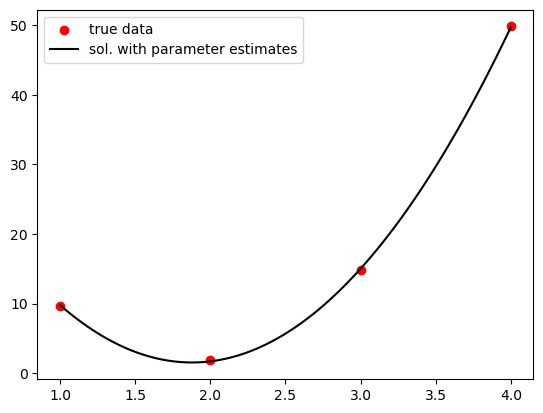

In [ ]:
x = np.linspace(np.min(x_data), np.max(x_data), 100)
# x_data의 최솟값과 최댓값 사이에서 균등하게 분포하는 100개의 점을 생성
y = my_func(x, *params4)
# 이렇게 생성된 x 값들에 대해, 최적화된 파라미터 params4를 사용하여 my_func를 통해 예측된 y 값들을 계산

figure = plt.figure()
axes = figure.add_subplot(111)
axes.scatter(x_data, y_data, label='true data', color = "red")
axes.plot(x, y, label='sol. with parameter estimates', color = "black")
axes.legend()
plt.show()
# matplotlib를 사용하여 실제 데이터와 회귀 결과를 그래프로 시각화
# 빨간색 점은 원본 데이터 (실제값)
# 검은색 선은 선형 함수의 예측
